<a href="https://colab.research.google.com/github/RayRodriguesBa/An-lise-explorat-ria-de-dados-PNAD/blob/main/An%C3%A1lise_Descritiva_PNAD2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

O objetivo deste trabalho é utilizar  os conhecimentos adquiridos no curso de estatística com python  da Alura para  realizar uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.



# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).



***
***

### Utilize a célula abaixo para importar as bibliotecas necessárias  para executar as tarefas

#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [6]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [4]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM



#### <font color='red'>Para construção das classes será consideado  o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.</font>




### 1º Definir os intevalos das classes em reais (R$)

In [7]:
classes = [
    dados.Renda.min(),
    2 * 788,
    5 * 788,
    15 * 788,
    25 * 788,
    dados.Renda.max()
]
classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [8]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [9]:
frequencia = pd.value_counts(
  pd.cut(x = dados.Renda,
         bins = classes,
         labels = labels,
         include_lowest = True)
)
frequencia

/tmp/ipython-input-2164425011.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia = pd.value_counts(


,count
Renda,
E,49755
D,18602
C,7241
B,822
A,420


### 4º Construir a coluna de percentuais

In [10]:
percentual = pd.value_counts(
  pd.cut(x = dados.Renda,
         bins = classes,
         labels = labels,
         include_lowest = True),
  normalize = True
) * 100
percentual

/tmp/ipython-input-1647745800.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual = pd.value_counts(


,proportion
Renda,
E,64.751432
D,24.208745
C,9.423477
B,1.069755
A,0.546590


### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [11]:
dist_freq_renda = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_renda.sort_index(ascending = False)

,Frequência,Porcentagem (%)
Renda,,
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<Axes: xlabel='Renda'>

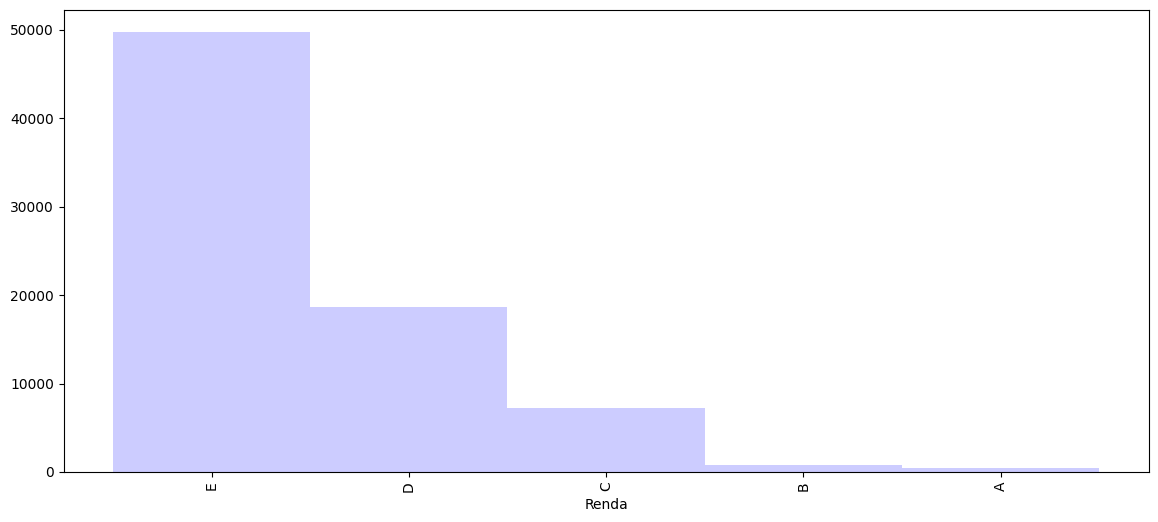

In [12]:
dist_freq_renda['Frequência'].plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize=(14, 6))

> ### Conclusões

Podemos a partir do gráfico tirar algumas conclusões da distribuição de renda no país


---




1.  A maior parte dos indivíduos está concentrada nas classes D e E,
principalmente na classe E, que apresenta a maior frequência.
2.  A medida que que caminhamos pelo eixo direito podemos perceber uma redução acentuada no número de pessoas por categoria.
1.  As classes A e B possuem frequência muito baixa em comparação às demais.Isso significa que poucos indíviduos ganham uma renda elevada, reforçando o caráter desigual da distribuição









### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

/tmp/ipython-input-2038978783.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Idade'])


<Axes: title={'center': 'Distribuição de Frequências - IDADE'}, xlabel='Anos', ylabel='Density'>

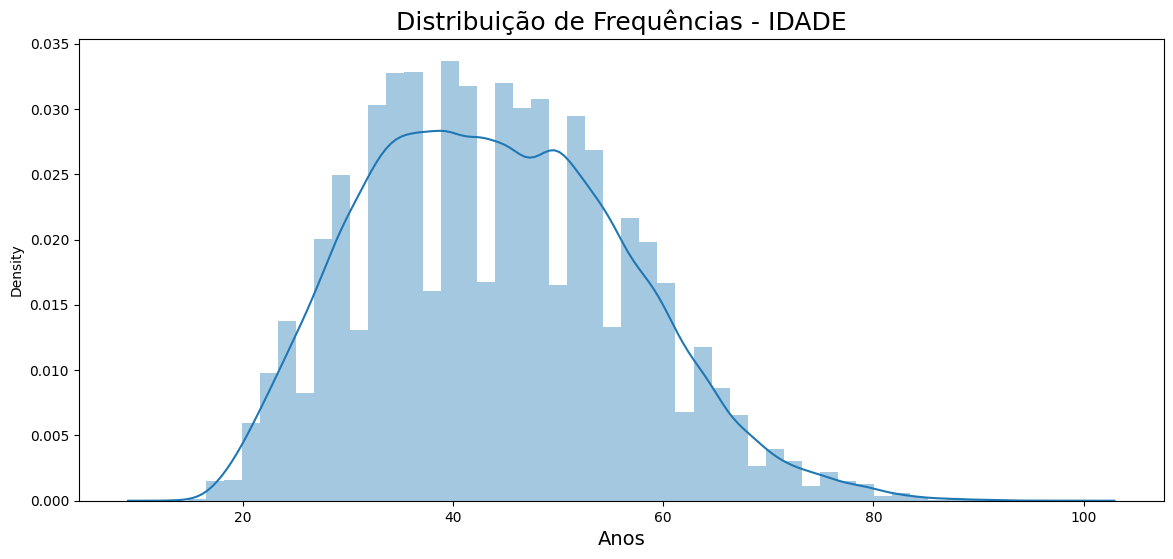

In [13]:
ax = sns.distplot(dados['Idade'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - IDADE', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

> ### Conclusões

 **Distribuição de Frequência idade**


1.   Distribuição assimétrica direita: Cauda longa à direita (idades mais altas: 60, 70, 80+)
2.   Maior concentração de indivíduos entre aproximadamente 25 e 50 anos

1.   A curva decresce lentamente após o pico, estendendo-se para idades mais elevadas

 *Possíveis causas:*

1- Estrutura etária da população brasileira: A maior densidade observada entre 25 e 50 anos corresponde às faixas etárias que compõem a população em idade ativa, conforme definição do IBGE, evidenciando a predominância desse grupo etário na amostra analisada.

2- Queda da taxa de natalidade: Faz com que a base muito jovem diminua, "deslocando" a massa da distribuição para idades adultas

3- Consequências do envelhecimento: Com o passar da idade o risco e a ocorrência de morte por doenças tende a aumentar.

/tmp/ipython-input-3941023768.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Altura'])


<Axes: title={'center': 'Distribuição de Frequências - ALTURA'}, xlabel='Metros', ylabel='Density'>

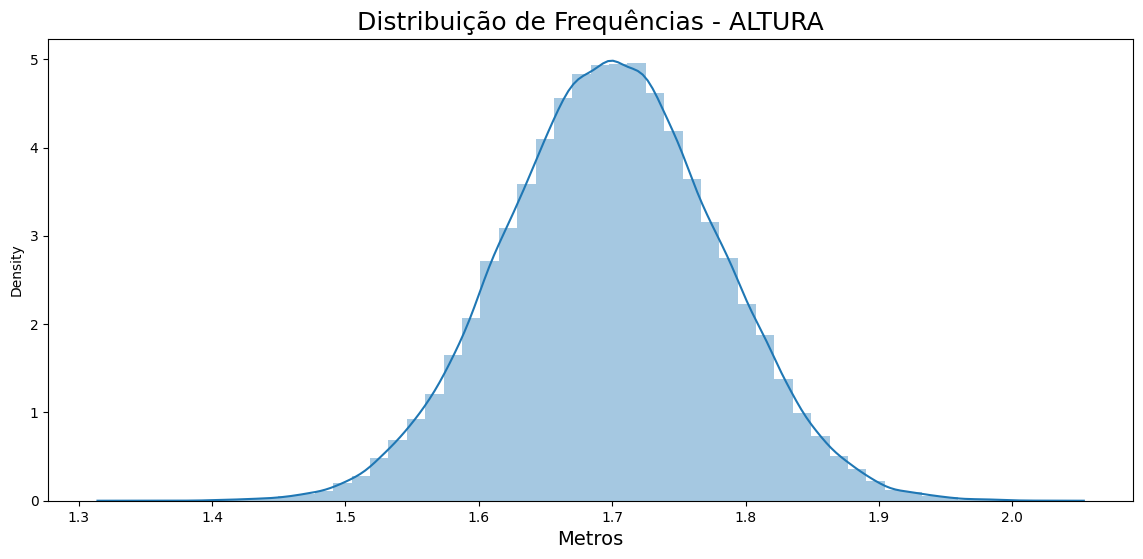

In [14]:
ax = sns.distplot(dados['Altura'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - ALTURA', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

> ### Conclusões

 **Distribuição de Frequência altura**


1.   Formato de curva em sino (próximo à distribuição normal)
2.   Pico em torno de 1,70 m

1.  Cauda direita (alturas mais elevadas) ligeiramente mais longa que a esquerda

 *Possíveis causas:*

1- Influência de fatores socioeconômicos: Estudos mostram associação indireta entre condições socioeconômicas na infância e altura/Populações com melhor acesso a nutrição e saúde tendem a apresentar alturas médias maiores

2- Influência genética: Os cientistas explicam que a altura adulta é determinada principalmente pelas informações codificadas em nosso DNA – crianças de pais altos tendem a ser mais altas e as de pais baixos são mais baixas, porém, essas estimativas não são perfeitas.

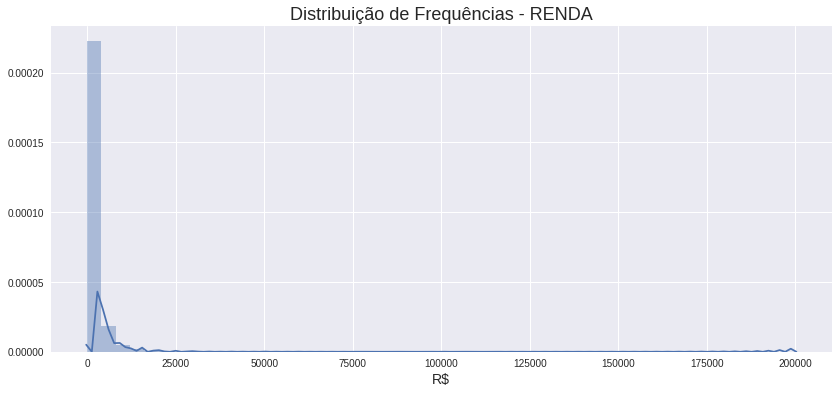

In [ ]:
ax = sns.distplot(dados['Renda'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - RENDA', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

> ### Conclusões

 **Distribuição de Frequência renda**


1.  Grande concentração de indivíduos com rendas baixas (próximo de R$ 0 a poucos milhares)

2.  Cauda longa à direita, chegando a valores muito elevados (até R$ 200.000)

1.  Frequência diminui rapidamente conforme a renda aumenta

 *Possíveis causas:*

1- Desigualdade socioeconomico: O brasil é um país de renda altamente concentrada, em que poucos indivíduos recebem rendas muito alta enquanto a maioria recebe rendas baixas ou moderadas.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

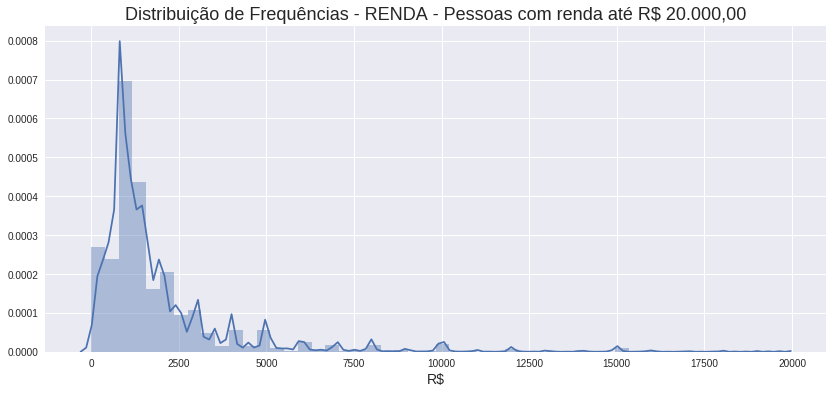

In [ ]:
ax = sns.distplot(dados.query('Renda < 20000')['Renda'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - RENDA - Pessoas com renda até R$ 20.000,00', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

> ### Conclusões

 **Distribuição de Frequência renda- eliminando valores extremos**

Eliminando valores extremos, fica ainda mais claro a concentração de pessoas na classe D(2 a 5 SM) e E( Até 2 SM)


1.  Forte concentração de observações nos menores níveis de renda

2.  Pico próximo a valores baixos (até 1.500 /  2.000)

1.  Cauda longa à direita, se estendendo até R$ 20.000

 *Possíveis causas:*

1- Desigualdade socioeconomico: O brasil é um país de renda altamente concentrada, em que poucos indivíduos recebem rendas muito alta enquanto a maioria recebe rendas baixas ou moderadas.

In [ ]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [ ]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor
                        )
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [ ]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         normalize = True
                        ) * 100
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões


1.  Obtendo a concentração dos dados por raça e cor, podemos concluir  que a população analisada é majoritariamente composta por pessoas pardas e brancas

1.   Consequetemente, observamos uma baixa proporção da raças Indígena e Amarela, o que pode indicar ou uma baixa proporção desses grupos na população geral ou uma sub-representação estatística

2.  Outro ponto relevante é a maior presença de homens na amostra analisada, indicando que, no conjunto de dados considerado, os homens tendem a ocupar com maior frequência a posição de pessoa de referência na amostra analisada pelo PNAD






## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [ ]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [ ]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [ ]:
dados.Renda.mode()[0]

788

### Obtenha o desvio médio absoluto

In [ ]:
dados.Renda.mad()

1526.4951371644931

### Obtenha a variância

In [ ]:
dados.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [ ]:
dados.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [ ]:
renda_estatisticas_por_sexo_e_cor = pd.crosstab(dados.Cor,
                                                dados.Sexo,
                                                values = dados.Renda,
                                                aggfunc = {'mean', 'median', 'max'})
renda_estatisticas_por_sexo_e_cor.rename(index = cor, inplace = True)
renda_estatisticas_por_sexo_e_cor.rename(columns = sexo, inplace = True)
renda_estatisticas_por_sexo_e_cor

max                  mean                 median         
Sexo     Masculino Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                     
Indígena     10000   120000  1081.710938  2464.386139     797.5    788.0
Branca      200000   100000  2925.744435  2109.866750    1700.0   1200.0
Preta        50000    23000  1603.861687  1134.596400    1200.0    800.0
Amarela      50000    20000  4758.251064  3027.341880    2800.0   1500.0
Parda       100000    30000  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões



1.   A média indica que quase em toda raças homens apresentam renda superior às mulheres.
2.  A mediana deixa isso ainda mais claro, a desigualdade de renda entre homens e mulheres persiste independente da raça.
3. A mediana menor que a média revela uma assimetria a direita com poucos rendimentos elevados puxando  a média para a direita, nesse sentido para representar melhor a renda típica a mediana é uma métrica melhor.
4. Os valores máximos de renda são predominantemente maiores entre homens, indicando uma maior concentração de renda entre homens.
5. Analisando a população indígena representada, percemos que em média as mulheres ganham mais e a mediana é bem próxima entre os sexos. O que pode indicar uma subrepresentação ou efeito de outliers.



1.   Pessoa brancas e amarelas apresentam maiores médias e medianas
2.   Pessoas pretas, pardas, indígenas apresentam renda menores





### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [ ]:
renda_dispersao_por_sexo_e_cor = pd.crosstab(dados.Cor,
                                         dados.Sexo,
                                         aggfunc = {'mad', 'var', 'std'},
                                         values = dados.Renda).round(2)
renda_dispersao_por_sexo_e_cor.rename(index = cor, inplace = True)
renda_dispersao_por_sexo_e_cor.rename(columns = sexo, inplace = True)
renda_dispersao_por_sexo_e_cor

mad                std                    var              
Sexo     Masculino Feminino Masculino  Feminino    Masculino      Feminino
Cor                                                                       
Indígena    798.91  3007.89   1204.09  11957.50   1449841.13  1.429818e+08
Branca     2261.01  1670.97   4750.79   3251.01  22570023.41  1.056909e+07
Preta       975.60   705.45   1936.31   1349.80   3749293.59  1.821960e+06
Amarela    3709.60  2549.15   5740.82   3731.17  32957069.62  1.392166e+07
Parda      1125.83   811.58   2312.09   1596.23   5345747.15  2.547960e+06

> ### Conclusões


 A análise das medidas de dispersão (MAD, desvio padrão e variância) evidencia forte heterogeneidade da renda, com diferenças relevantes entre sexos e grupos raciais.




1.  Em praticamente todas as categorias de cor/raça, os homens apresentam maiores valores de desvio padrão e variância em relação às mulheres. Ou seja, a renda masculina é mais desigual internamente.
2.  Consequentemente, as mulheres apresentam em geral menor dispersão. Ou seja, rendimentos comumente concentrados em faixas salariais semelhantes.
1.   Analisando os grupos com maior desigualdade interna, destaca-se a raça amarela e branca. Ou seja, há coexistencia de rendimentos muito alto e rendimentos muito baixo
2.  Olhando os grupos com menor dispersão, destaca-se  os grupos de pessoas pretas e pardas. Indicando menor presença de rendimentos elevados nesses grupos.
1.    O grupo indígena, especialmente no sexo feminino, apresenta medidas de dispersão muito elevada. Possíveis causas: tamanho da amostra, presença de outliers.








### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

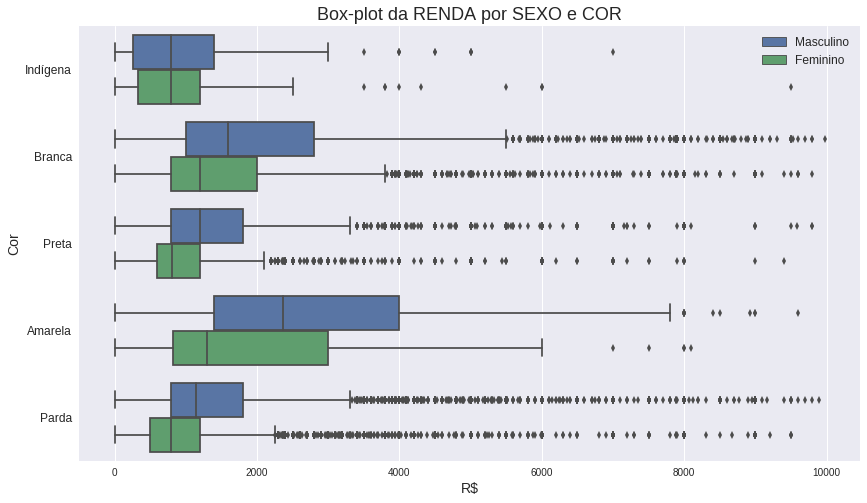

In [ ]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data=dados.query('Renda < 10000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por SEXO e COR', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Cor', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax

> ### Conclusões


1.    Em todas as raças representadas a mediana masculina é maior.
2.   Os boxplots masculino são geralmente mais longos, sugerindo uma maior variação de acesso a rendas elevada (desigualdade interna). entre os  homens.


1.   Grupos de pesssoas brancas e amarelas apresentam as maiores rendas, porém com uma variação de acesso a rendas mais altas.
2.   Preta, Parda e Indígena: Apresentam boxes muito mais "achatados" à esquerda, indicando que a grande maioria dessas populações está concentrada nas faixas de renda mais baixas.


1.   O grupo Branca possui a maior densidade de outliers de alta renda, chegando a valores que ultrapassam muito os limites dos outros grupos.
2.   Mesmo nos grupos de menor renda (Preta e Parda), existem outliers, mas eles são menos frequentes em valores extremamente altos quando comparados ao grupo de cor Branca.






### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [ ]:
from scipy import stats

percentual = stats.percentileofscore(dados.Renda, 788, kind = 'weak')
print("{0:.2f}%".format(percentual))

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [ ]:
valor = dados.Renda.quantile(.99)
print("R$ {0:.2f}".format(valor))

R$ 15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [ ]:
renda_estatisticas_por_sexo_e_estudo = pd.crosstab(dados['Anos de Estudo'],
                                         dados.Sexo,
                                         aggfunc = {'mean', 'median', 'max', 'std'},
                                         values = dados.Renda).round(2)
renda_estatisticas_por_sexo_e_estudo.rename(index = anos_de_estudo, inplace = True)
renda_estatisticas_por_sexo_e_estudo.rename(columns = sexo, inplace = True)
renda_estatisticas_por_sexo_e_estudo

max               mean           \
Sexo                           Masculino Feminino Masculino Feminino   
Anos de Estudo                                                         
Sem instrução e menos de 1 ano     30000    10000    799.49   516.20   
1 ano                              30000     2000    895.63   492.77   
2 anos                             40000     4000    931.18   529.91   
3 anos                             80000     3500   1109.20   546.85   
4 anos                             50000    10000   1302.33   704.28   
5 anos                             35000     8000   1338.65   781.39   
6 anos                             25000     6000   1448.88   833.73   
7 anos                             40000     9000   1465.50   830.75   
8 anos                             30000    18000   1639.40   933.62   
9 anos                             60000    20000   1508.04   868.02   
10 anos                            45000     6000   1731.27   925.92   
11 anos                           200000   100000   2117.06  1286.79   
12 anos                            30000   120000   2470.33  1682.31   
13 anos                            25000    20000   3195.10  1911.73   
14 anos                            50000    20000   3706.62  2226.46   
15 anos ou mais                   200000   100000   6134.28  3899.51   
Não determinados                    7000     3000   1295.76   798.17   

                                  median                std           
Sexo                           Masculino Feminino Masculino Feminino  
Anos de Estudo                                                        
Sem instrução e menos de 1 ano       700      390   1023.90   639.31  
1 ano                                788      400   1331.95   425.29  
2 anos                               788      450   1435.17   498.23  
3 anos                               800      500   2143.80   424.12  
4 anos                              1000      788   1419.82   629.55  
5 anos                              1045      788   1484.65   635.78  
6 anos                              1200      788   1476.63   574.55  
7 anos                              1200      788   1419.71   602.04  
8 anos                              1300      800   1515.58   896.78  
9 anos                              1200      788   2137.66   973.22  
10 anos                             1218      800   2078.61   620.61  
11 anos                             1500     1000   2676.54  1819.04  
12 anos                             1800     1200   2268.08  4851.83  
13 anos                             2400     1300   2797.12  2053.79  
14 anos                             2500     1600   3987.21  2064.08  
15 anos ou mais                     4000     2800   7447.61  4212.77  
Não determinados                    1200      788    979.65   459.99

> ### Conclusões


1.    O aumento mais expressivo ocorre na categoria "15 anos ou mais", onde a média salarial masculina atinge 6.134,28 e a feminina 3.899,51, valores significativamente superiores a qualquer outra faixa.
2.  A cada ano adicional de estudo, tanto a média quanto a mediana tendem a subir, confirmando que o investimento em educação impacta diretamente o aspecto financeiro.

1.  Mesmo quando ambos possuem "15 anos ou mais" de estudo, a mediana masculina (4.000)  é muito superior à feminina ( 2.800).
2.  Em quase todos os níveis o teto de renda masculino supera o feminino
1.  O desvio padrão (std) aumenta drasticamente conforme o nível de instrução sobe.




### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

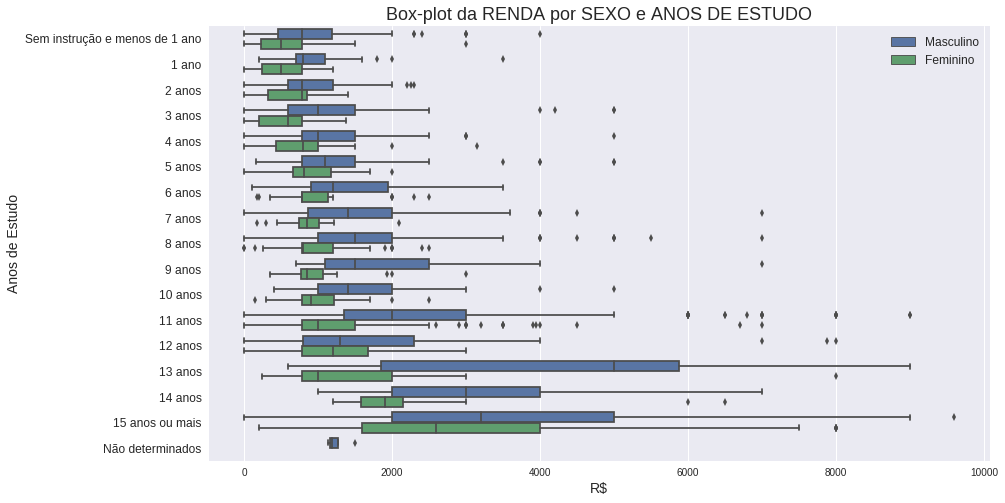

In [ ]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data=dados.query('Renda < 10000 and Idade == 50'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por SEXO e ANOS DE ESTUDO', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Anos de Estudo', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax

> ### Conclusões



1.  A escolaridade é um fator que influencia a renda. Observa-se um crescimento progressivo da renda à medida que aumentam os anos de estudo


1.   Grupos com poucos anos de estudo apresentam maior homegenidade e concetração em valores mais baixos. Isso sugere menores oportunidade de progressão financeira nesses níveis.




1.   Novamente, podemos perceber também que em todos os níveis a desigualdade de gênero persiste. Os dados mostram que, mesmo quando as mulheres possuem nível educacional equivalente, ganham predominante mais do que as mulheres


1.   Podemos observar que nos níveis 13 ou mais as caixas tendem  a ser mais largas, ter bigodes mais longos e a presença de muitos outliers. Isso indica que Isso indica que, embora a renda média aumente, a desigualdade interna também cresce.

2.   O maior salto salarial ocorre na transição para "15 anos ou mais" de estudo. A média masculina sobe de 2500(14 anos) para R$ 4000, enquanto a feminina vai de 1600 para 2800.






### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [ ]:
renda_estatisticas_por_uf = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
renda_estatisticas_por_uf.rename(index = uf)

Renda                            
                            mean median     max          std
UF                                                          
Rondônia             1789.761223   1200   50000  2406.161161
Acre                 1506.091782    900   30000  2276.233415
Amazonas             1445.130100    900   22000  1757.935591
Roraima              1783.588889   1000   20000  2079.659238
Pará                 1399.076871    850   50000  2053.779555
Amapá                1861.353516   1200   15580  2020.688632
Tocantins            1771.094946   1000   60000  2934.590741
Maranhão             1019.432009    700   30000  1887.816905
Piauí                1074.550784    750   40000  2373.355726
Ceará                1255.403692    789   25000  1821.963536
Rio Grande do Norte  1344.721480    800   15500  1651.805500
Paraíba              1293.370487    788   30000  1950.272431
Pernambuco           1527.079319    900   50000  2389.622497
Alagoas              1144.552602    788   11000  1237.856197
Sergipe              1109.111111    788   16000  1478.997878
Bahia                1429.645094    800  200000  3507.917248
Minas Gerais         2056.432084   1200  100000  3584.721547
Espírito Santo       2026.383852   1274  100000  3513.846868
Rio de Janeiro       2496.403168   1400  200000  5214.583518
São Paulo            2638.104986   1600   80000  3503.777366
Paraná               2493.870753   1500  200000  4302.937995
Santa Catarina       2470.854945   1800   80000  3137.651112
Rio Grande do Sul    2315.158336   1500   35000  2913.335783
Mato Grosso do Sul   2262.604167   1500   42000  3031.419122
Mato Grosso          2130.652778   1500   35000  2542.630178
Goiás                1994.580794   1500   30000  2221.933065
Distrito Federal     4241.954722   2000  100000  5550.463338

> ### Conclusões



1.  A renda média e a mediana costumam ser muito elevado em UFs da região Sudeeste, Norte e DF.

1.   Em todos os estados, a média é maior que a mediana, sugerindo a presença de poucas pessoas que ganham muito.




1.  O alto desvio padrão em alguns estados, como DF, RJ, SP, PR, MG indica a coexistência de pessoas de baixa renda e altíssima renda.


1.   Já alguns estados, como AL, SE, AM, RN, destcam-se por uma menor dispersão. A menor desigualdade não significa renda alta, pode indicar a  homeginidade e concetração em níveis baixos de rendimento.






### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

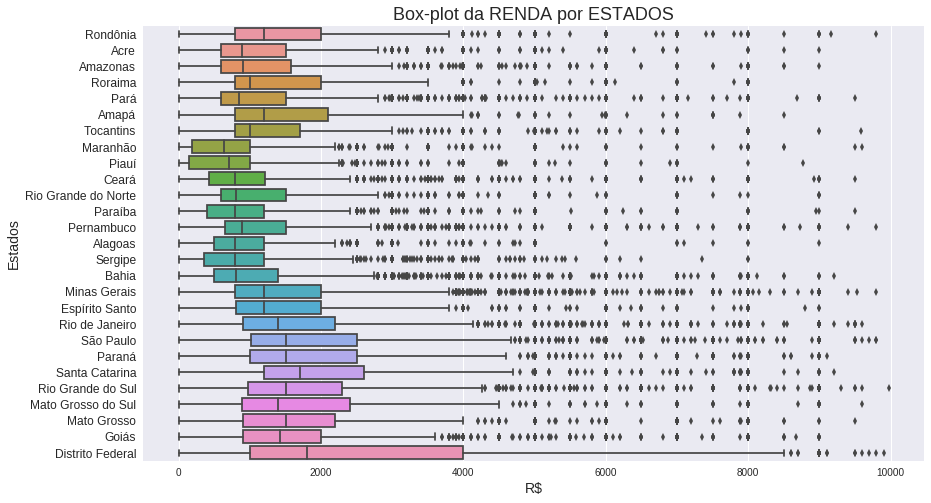

In [ ]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data=dados.query('Renda < 10000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por ESTADOS', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Estados', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels([key for key in uf.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

ax

> ### Conclusões



1.   Existe uma disparidade clara entre as regiões do Brasil. Os estados das regiões Sul, Sudeste e o Distrito Federal apresentam caixas deslocadas para a direita, indicando rendas medianas significativamente superiores as de outras regiões.
2.  O Distrito Federal possui o perfil de renda mais elevado e heterogêneo de todo o gráfico indicado por uma caixa e bigode consideravelmente maior do que de outros estados.

2.   Estados como Maranhão, Piauí, Alagoas e Ceará apresentam as menores medianas. As caixas estão comprimidas à esquerda, o que indica que a grande maioria da população nessas regiões sobrevive com rendas concentradas na faixa mais baixa da escala.

4. Outro ponto relevante é a presença expressiva de outliers na distribuição da renda. Esse padrão evidencia a forte concentração de altos rendimentos em uma pequena parcela da população, fenômeno observado inclusive em estados que não se destacam pelos elevados níveis medianos de renda.